## Regression : PyTorch

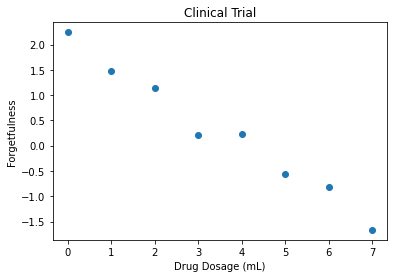

In [1]:
import torch
import matplotlib.pyplot as plt
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
y = -0.5*x + 2 + torch.normal(mean = torch.zeros(8), std = 0.2)
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel('Drug Dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x, y)

### Initialize slope with random value m = 0.9

In [2]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()
print(m, b)

tensor([0.9000], requires_grad=True) tensor([0.1000], requires_grad=True)


In [3]:
#Define regression function
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

In [4]:
yhat = regression(x, m, b)
print(yhat)

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)


In [5]:
#Regression plot function
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    ax.scatter(my_x, my_y)
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b)
    y_max = regression(x_max, my_m, my_b)
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

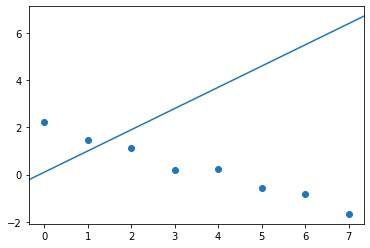

In [6]:
regression_plot(x, y, m, b)

In [7]:
def MSE(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma / len(my_y)

In [8]:
C = MSE(yhat, y)
print(C)

tensor(19.4572, grad_fn=<DivBackward0>)


### Autodiff can be used here

In [9]:
C.backward()

In [10]:
m.grad

tensor([35.7003])

In [11]:
b.grad

tensor([5.9306])

## Gradient Descent (built-in)

In [12]:
optimizer = torch.optim.SGD([m, b], lr = 0.01)

In [13]:
optimizer.step()

In [14]:
[m, b]

[tensor([0.5430], requires_grad=True), tensor([0.0407], requires_grad=True)]

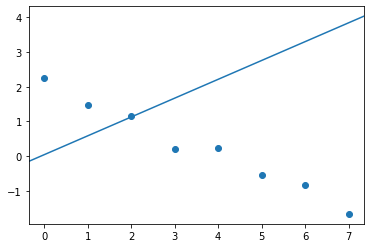

In [15]:
regression_plot(x, y, m, b)

In [17]:
C = MSE(regression(x, m, b), y)
print(C)

tensor(8.7425, grad_fn=<DivBackward0>)


### Iteratively move COST to Zero

In [19]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad() #Reset gradient to zero

    yhat = regression(x, m, b)      #Step # 1
    C = MSE(yhat, y)                #Step # 2
    C.backward()                    #Step # 3
    optimizer.step()                #Step # 4
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), 
    '%.3g' % b.grad.item()))

Epoch 0, cost 4.4, m grad 14.6, b grad 1.65
Epoch 1, cost 2.64, m grad 9.36, b grad 0.598
Epoch 2, cost 1.91, m grad 6.04, b grad -0.0697
Epoch 3, cost 1.61, m grad 3.93, b grad -0.491
Epoch 4, cost 1.48, m grad 2.59, b grad -0.757
Epoch 5, cost 1.42, m grad 1.74, b grad -0.923
Epoch 6, cost 1.38, m grad 1.19, b grad -1.03
Epoch 7, cost 1.36, m grad 0.848, b grad -1.09
Epoch 8, cost 1.34, m grad 0.627, b grad -1.13
Epoch 9, cost 1.33, m grad 0.487, b grad -1.15
Epoch 10, cost 1.31, m grad 0.397, b grad -1.16
Epoch 11, cost 1.3, m grad 0.339, b grad -1.16
Epoch 12, cost 1.28, m grad 0.302, b grad -1.16
Epoch 13, cost 1.27, m grad 0.278, b grad -1.16
Epoch 14, cost 1.25, m grad 0.262, b grad -1.16
Epoch 15, cost 1.24, m grad 0.251, b grad -1.15
Epoch 16, cost 1.23, m grad 0.244, b grad -1.15
Epoch 17, cost 1.21, m grad 0.239, b grad -1.14
Epoch 18, cost 1.2, m grad 0.235, b grad -1.14
Epoch 19, cost 1.18, m grad 0.232, b grad -1.13
Epoch 20, cost 1.17, m grad 0.23, b grad -1.12
Epoch 21,

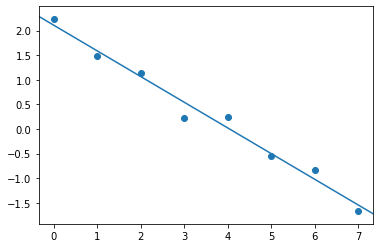

In [20]:
regression_plot(x, y, m, b)